<a href="https://colab.research.google.com/github/alexey9019/data/blob/master/Copy_of_sem_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Отзывы на фильм imdb

In [0]:
from keras.datasets import imdb
import keras

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=50000,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [0]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [0]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [0]:
def decode_review(sample, train, test):
    word_to_id = keras.datasets.imdb.get_word_index()
    word_to_id = {k:(v+3) for k,v in word_to_id.items()}
    word_to_id["<PAD>"] = 0
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2
    word_to_id["<UNUSED>"] = 3

    id_to_word = {value:key for key,value in word_to_id.items()}

    return ' '.join(id_to_word[id] for id in sample)

In [0]:
print(decode_review(x_test[1], x_test, y_test))
print(y_test[1])

<START> this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances austen's the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere rife with sexual tension and psychological trickery it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the solemn moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual repression and desperation be patient

In [0]:
print(decode_review(x_train[20], x_train, y_train))
print(y_train[20])

<START> shown in australia as <UNK> this incredibly bad movie is so bad that you become <UNK> and have to watch it to the end just to see if it could get any worse and it does the storyline is so predictable it seems written by a high school dramatics class the sets are pathetic but marginally better than the miniatures and the acting is wooden br br the infant <UNK> seems to have been stolen from the props cupboard of 'total recall' there didn't seem to be a single original idea in the whole movie br br i found this movie to be so bad that i laughed most of the way through br br malcolm mcdowell should hang his head in shame he obviously needed the money
0


----

# Алгоритмы

In [0]:
# импортируем библиотеки
# модули для быстрых операций с числами
import numpy as np
import pandas as pd
# модули для получения данных, работы с папками
import os
from operator import itemgetter
# модули для визуализации
import matplotlib.pyplot as plt
import warnings
# модули для создания сетей
import tensorflow as tf
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
# датасет
from keras.datasets import imdb

# игнорируем предупреждения
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

In [0]:
# создаем one hot репрезентацию слов т.е. 2 = 001000.... 4 = 00001000... длиной 50к
def vectorize_sequences(sequences, dimension=50000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [0]:
# превращаем обучающую в one hot вектора
x_train = vectorize_sequences(x_train)
# аналогично для теста
x_test = vectorize_sequences(x_test)
# отобразим их размерность
print("размерность x_train", x_train.shape)
print("размерность x_test", x_test.shape)

размерность x_train (25000, 50000)
размерность x_test (25000, 50000)


In [0]:
# изменяем тип данных лейблов для корректности обучения
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
# отобразим их размерность
print("размерность y_train ", y_train.shape)
print("размерность y_test ", y_test.shape)

размерность y_train  (25000,)
размерность y_test  (25000,)


Создадим полносвязную сеть

In [0]:
model = models.Sequential()
model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# FIT / TRAIN model

NumEpochs = 10
BatchSize = 32

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# сохраним историю метрик качества по эпохам
history = model.fit(x_train, y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_test, y_test))

results = model.evaluate(x_test, y_test)
print("_"*100)
print("Тестовый loss и accuracy", results)
# запишем результаты
history_dict = history.history
# history_dict.keys()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 25000 samples, validate on 25000 samples
Epoch 1/2





25000/25000 [==============================] - 26s 1ms/step - loss: 10.8633 - acc: 0.8162 - val_loss: 9.6463 - val_acc: 0.8375
Epoch 2/2
25000/25000 [==============================] - 6s 224us/step
____________________________________________________________________________________________________
Тестовый loss и accuracy [9.666435981750489, 0.85188]


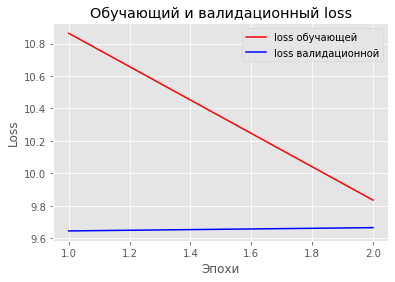

In [0]:
# посмотрим на графики изменения ошибки по эпохе
plt.clf()
history_dict = history.history
# получим значения из сохраненного словаря с историей
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'r', label='loss обучающей')
plt.plot(epochs, val_loss_values, 'b', label='loss валидационной')
plt.title('Обучающий и валидационный loss')
plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.legend()
plt.show()

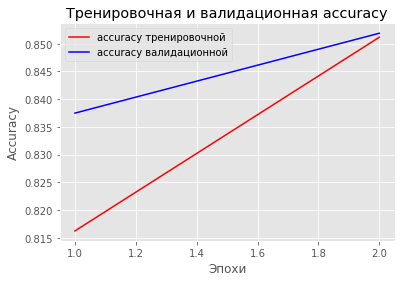

In [0]:
# accuracy на валидационной выборке
plt.clf()
# получим значения из сохраненного словаря с историей
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
# построим графики по accuracy на train и val
plt.plot(epochs, acc_values, 'r', label='accuracy тренировочной')
plt.plot(epochs, val_acc_values, 'b', label='accuracy валидационной')
plt.title('Тренировочная и валидационная accuracy')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
from sklearn.metrics import classification_report
# векторизируем тестовую выборку
# test_data_x = vectorize_sequences(test_data)
# получим от нее предсказания по модели
predictions = model.predict(x_test)
print('Сырой вид наших предсказаний')
# округлим предсказания в сторону 0 или 1, сравнив с тестовой
print(classification_report(y_test, np.around(predictions)))

Сырой вид наших предсказаний
              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84     12500
         1.0       0.80      0.94      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000



In [0]:
review_data = np.array([x_test[0], x_test[1]])

model.predict(review_data)

array([[0.3596546 ],
       [0.99567986]], dtype=float32)

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? 

In [0]:
# define preprocessing function
import string

def preprocess(doc):
    # lowercasing
    doc = doc.lower()
    # remove punctuation and different kinds of whitespaces e.g. newlines and tabs
    for p in string.punctuation + string.whitespace:
        doc = doc.replace(p, ' ')
    # remove unneeded spaces
    doc = doc.strip()
    doc = ' '.join([w for w in doc.split(' ') if w != ''])
    return doc